In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
#Defining the Business Problem
#1.What are the best selling products and categories?
#2.What is the average order value?
#3.What is the customer retention rate?
#4.What is the customer acquisition cost?
#5.Which marketing channels drive the most traffic and sales?

In [46]:
df1=pd.read_csv('Customer.csv')
df1.head()
df2=pd.read_csv('Transactions.csv')
df2.head()
df3=pd.read_csv('prod_cat_info.csv')
df3.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [47]:
df1.head()

,customer_Id,DOB,Gender,city_code,city_name
0,268408,02-01-1970,M,4.0,San Francisco
1,269696,07-01-1970,F,8.0,Torrance
2,268159,08-01-1970,F,8.0,Torrance
3,270181,10-01-1970,F,2.0,Malibu
4,268073,11-01-1970,M,1.0,Los Angeles


In [48]:
df2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Total Amount,Tax,Total_amt_with_tax,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,3860,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,7485,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,1582,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,4089,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,1582,166.110,-1748.110,TeleShop


In [49]:
df2=df2.rename(columns={'cust_id':'customer_Id'})

In [50]:
#Merging Entire dataset

In [51]:
df4=pd.merge(df2,df1,how='left',on='customer_Id')


In [52]:
df4.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Total Amount,Tax,Total_amt_with_tax,Store_type,DOB,Gender,city_code,city_name
0,80712190438,270351,28-02-2014,1,1,-5,-772,3860,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Riverside
1,29258453508,270384,27-02-2014,5,3,-5,-1497,7485,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Torrance
2,51750724947,273420,24-02-2014,6,5,-2,-791,1582,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Torrance
3,93274880719,271509,24-02-2014,11,6,-3,-1363,4089,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Oakland
4,51750724947,273420,23-02-2014,6,5,-2,-791,1582,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Torrance


In [53]:
E_commerce_data=pd.merge(df4,df3,how='left',on='prod_cat_code')
E_commerce_data.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Total Amount,Tax,Total_amt_with_tax,Store_type,DOB,Gender,city_code,city_name,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,3860,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Riverside,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,3860,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Riverside,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,3860,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Riverside,Clothing,3,Kids
3,29258453508,270384,27-02-2014,5,3,-5,-1497,7485,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Torrance,Electronics,4,Mobiles
4,29258453508,270384,27-02-2014,5,3,-5,-1497,7485,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Torrance,Electronics,5,Computers


In [54]:
#checking info about dataset

In [55]:

print(E_commerce_data.shape)
print(E_commerce_data.info())
print(E_commerce_data.describe())


(99293, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      99293 non-null  int64  
 1   customer_Id         99293 non-null  int64  
 2   tran_date           99293 non-null  object 
 3   prod_subcat_code    99293 non-null  int64  
 4   prod_cat_code       99293 non-null  int64  
 5   Qty                 99293 non-null  int64  
 6   Rate                99293 non-null  int64  
 7   Total Amount        99293 non-null  int64  
 8   Tax                 99293 non-null  float64
 9   Total_amt_with_tax  99293 non-null  float64
 10  Store_type          99293 non-null  object 
 11  DOB                 99293 non-null  object 
 12  Gender              99253 non-null  object 
 13  city_code           99257 non-null  float64
 14  city_name           99257 non-null  object 
 15  prod_cat            99293 non-null  objec

In [56]:
# Check for missing values
print(E_commerce_data.isnull().sum())

transaction_id         0
customer_Id            0
tran_date              0
prod_subcat_code       0
prod_cat_code          0
Qty                    0
Rate                   0
Total Amount           0
Tax                    0
Total_amt_with_tax     0
Store_type             0
DOB                    0
Gender                40
city_code             36
city_name             36
prod_cat               0
prod_sub_cat_code      0
prod_subcat            0
dtype: int64


In [29]:
E_commerce_data[E_commerce_data['Gender'].isnull()]

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Total Amount,Tax,Total_amt_with_tax,Store_type,DOB,Gender,city_code,city_name,prod_cat,prod_sub_cat_code,prod_subcat
7582,85496594077,267199,27-11-2013,1,1,-4,-366,1464,153.720,-1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,4,Mens
7583,85496594077,267199,27-11-2013,1,1,-4,-366,1464,153.720,-1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,1,Women
7584,85496594077,267199,27-11-2013,1,1,-4,-366,1464,153.720,-1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,3,Kids
7841,85496594077,267199,24-11-2013,1,1,4,366,1464,153.720,1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,4,Mens
7842,85496594077,267199,24-11-2013,1,1,4,366,1464,153.720,1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,1,Women
7843,85496594077,267199,24-11-2013,1,1,4,366,1464,153.720,1617.720,e-Shop,14-02-1970,NaN,2.0,Malibu,Clothing,3,Kids
16680,5723163001,267199,15-08-2013,6,5,1,244,244,25.620,269.620,e-Shop,14-02-1970,NaN,2.0,Malibu,Books,7,Fiction
16681,5723163001,267199,15-08-2013,6,5,1,244,244,25.620,269.620,e-Shop,14-02-1970,NaN,2.0,Malibu,Books,12,Academic
16682,5723163001,267199,15-08-2013,6,5,1,244,244,25.620,269.620,e-Shop,14-02-1970,NaN,2.0,Malibu,Books,10,Non-Fiction
16683,5723163001,267199,15-08-2013,6,5,1,244,244,25.620,269.620,e-Shop,14-02-1970,NaN,2.0,Malibu,Books,11,Children


In [30]:
#Replacing null values with NA

In [32]:
E_commerce_data=E_commerce_data.fillna('Na',inplace=True)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Explore the distribution of each numerical variable

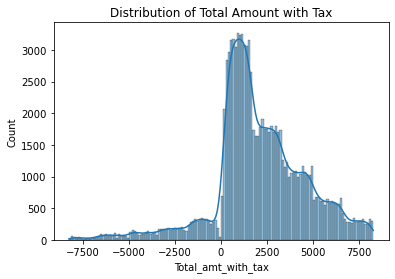

In [63]:
sns.histplot(E_commerce_data['Total_amt_with_tax'], kde=True)
plt.title('Distribution of Total Amount with Tax')
plt.show()

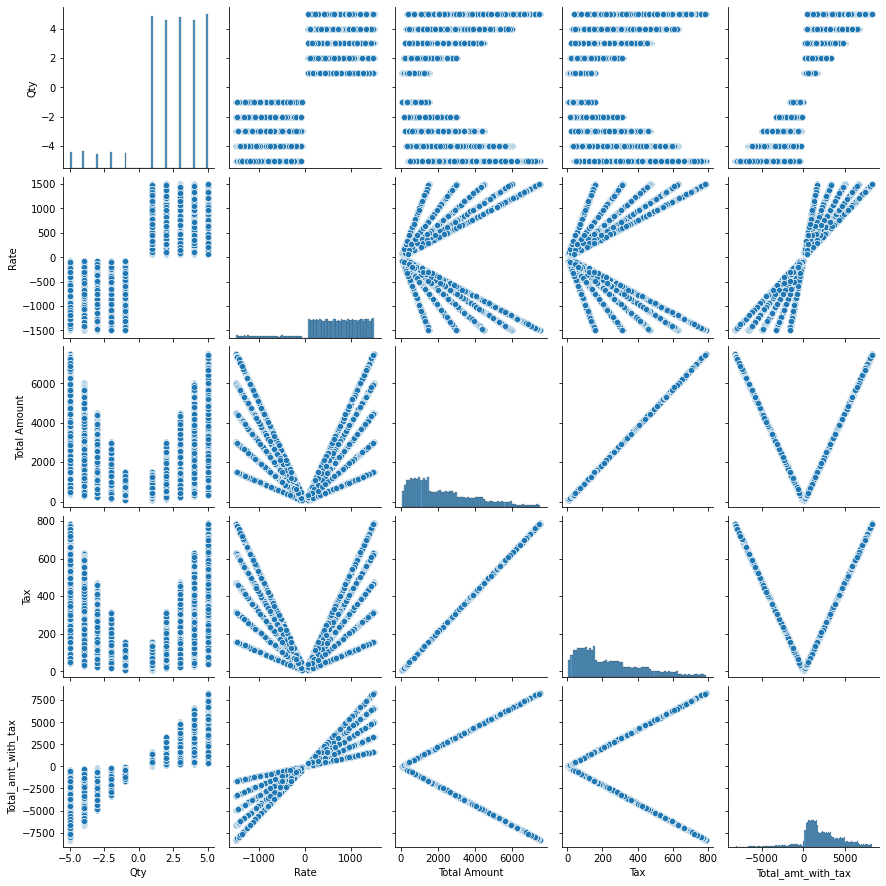

In [64]:
# Explore the relationship between numerical variables
sns.pairplot(E_commerce_data[['Qty', 'Rate', 'Total Amount', 'Tax', 'Total_amt_with_tax']])
plt.show()

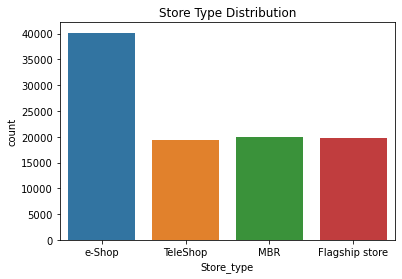

In [65]:
# Explore the relationship between categorical variables
#4. Which marketing channels drive the most traffic and sales?
sns.countplot(x='Store_type', data=E_commerce_data)
plt.title('Store Type Distribution')
plt.show()

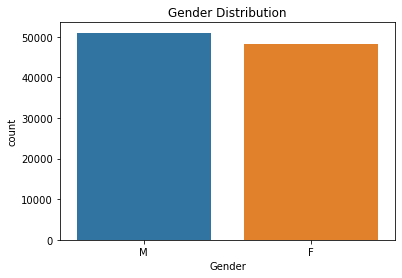

In [66]:
sns.countplot(x='Gender', data=E_commerce_data)
plt.title('Gender Distribution')
plt.show()

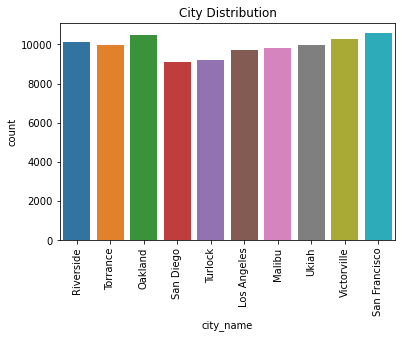

In [67]:
sns.countplot(x='city_name', data=E_commerce_data)
plt.title('City Distribution')
plt.xticks(rotation=90)
plt.show()

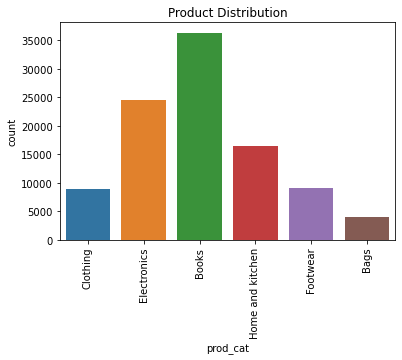

In [68]:
sns.countplot(x='prod_cat', data=E_commerce_data)
plt.title('Product Distribution')
plt.xticks(rotation=90)
plt.show()

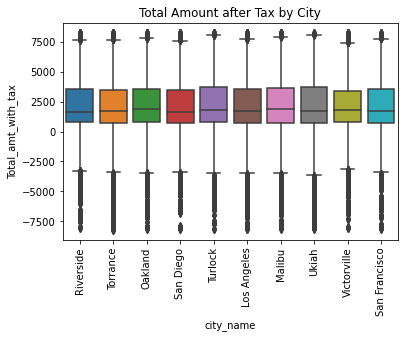

In [71]:
sns.boxplot(x='city_name', y='Total_amt_with_tax', data=E_commerce_data)
plt.title('Total Amount after Tax by City')
plt.xticks(rotation=90)
plt.show()